### Extracting outliers from UKB dMRI parameters

In [43]:
%matplotlib inline
import os
import sys
import csv
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors

ukb_root = '/project_freenas/3022017.02/UKB'
sys.path.append(os.path.join(ukb_root,'scripts'))
from ukb_utils import get_variables_UKB, lookup_UKB
ukb_idp_dir = os.path.join(ukb_root,'phenotypes','current')

### Load Data

In [2]:
### Read dMRI data of available participants
train_data = '/home/preclineu/ramcir/Desktop/Diffusion/diffusion_nm/df_tr.pkl'
test_data = '/home/preclineu/ramcir/Desktop/Diffusion/diffusion_nm/df_te.pkl'
with open(train_data, 'rb') as f: 
    data_train = pickle.load(f)
    data_train = data_train.astype('float64')
with open(test_data, 'rb') as f: 
    data_test = pickle.load(f)
    data_test = data_test.astype('float64')    
data = pd.concat([data_train,data_test])  

# Read Z-scores of available participants
z_path_train = '/home/preclineu/ramcir/Desktop/Diffusion/diffusion_nm/braincharts/models/test/Mean_ICVF_in_body_of_corpus_callosum_on_FA_skeleton/Z_training.txt'
z_path_test = '/home/preclineu/ramcir/Desktop/Diffusion/diffusion_nm/braincharts/models/test/Mean_ICVF_in_body_of_corpus_callosum_on_FA_skeleton/Z_estimate.txt'
data_train = [float(number)
        for line in open(z_path_train, 'r')
        for number in line.split()]
data_test = [float(number)
        for line in open(z_path_test, 'r')
        for number in line.split()]
z_scores_train = pd.DataFrame(data_train, columns =['z_scores'])
z_scores_test = pd.DataFrame(data_test, columns =['z_scores'])
z_scores = pd.concat([z_scores_train,z_scores_test])  

# Assign the right participant ID to the right z-score
z_scores.index = data.index

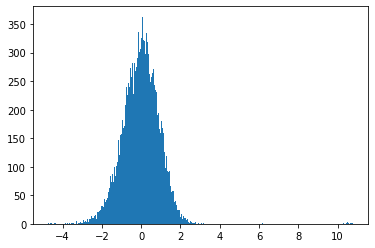

In [17]:
# Plot z-scores histogram
plt.hist(z_scores['z_scores'],bins=500)
plt.show()

### Select outliers

In [49]:
# threshold z-values 
threshold = 5
th_z_scores = z_scores.copy(deep=True)
th_z_scores = z_scores.mask(z_scores<threshold)
th_z_scores.dropna(inplace=True)
print(len(th_z_scores), 'outliers for threshold z =', threshold)

# save subs id list
th_subs = th_z_scores.index
save_path = '/home/preclineu/ramcir/Desktop/Diffusion/diffusion_nm/th5_zscores_ICVFcorpus.npy'
np.save(save_path, th_subs)

26 outliers for threshold z = 5


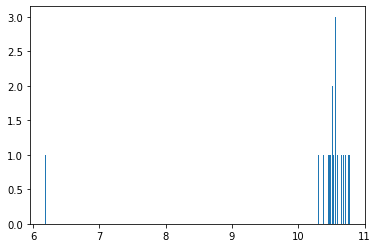

In [30]:
plt.hist(th_z_scores['z_scores'],bins=500)
plt.show()